In [29]:
import numpy as np
import pandas as pd

df = pd.read_csv("../data/filtered_with_img.csv", index_col=0).reset_index(drop=True)
df

,name,city,description,stars,price,rating,reviews,image,images,categoryReviews,...,san_jose,seattle,toronto,tucson,washington_dc,Width,Height,Color,Dominate,Brightness
0,Sheraton Centre Toronto Hotel,toronto,"Located in the center of downtown Toronto, thi...",0.991736,467.0,0.126560,0.566306,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 8.5}, {'title': '...",...,0,0,1,0,0,1024,683,[160.03191629 154.12408206 149.43024942],[200.57826 200.7613 203.15504],155.256676
1,Executive Hotel Cosmopolitan Toronto,toronto,You're eligible for a Genius discount at Execu...,0.991736,326.0,0.032423,0.525022,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 8.6}, {'title': '...",...,0,0,1,0,0,1024,683,[92.64822875 80.32992228 73.82429167],[19.295359 15.373721 14.762594],83.055545
2,Bisha Hotel Toronto,toronto,You're eligible for a Genius discount at Bisha...,2.234641,494.0,0.785521,-0.380641,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 9.2}, {'title': '...",...,0,0,1,0,0,1024,698,[125.08205643 124.53883865 125.15122028],[170.05089 169.21521 166.77252],124.711664
3,"Holiday Inn Toronto Downtown Centre, an IHG Hotel",toronto,This hotel is located next door to Maple Leaf ...,0.991736,285.0,-0.249989,4.755752,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 8.5}, {'title': '...",...,0,0,1,0,0,1024,683,[157.78680911 150.75462116 131.68814914],[183.58603 179.1546 161.714 ],151.273481
4,Delta Hotels by Marriott Toronto,toronto,"Located in the heart of downtown Toronto, the ...",0.991736,490.0,0.785521,0.677256,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 9}, {'title': 'Fa...",...,0,0,1,0,0,1024,683,[142.68008356 127.70386421 118.32489791],[110.95356 77.24888 60.295742],130.871141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,Cambria Hotel Washington D.C. Capitol Riverfront,washington_dc,"Located in Washington, D.C., a 4-minute walk f...",0.991736,699.0,0.314835,0.773585,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 8.6}, {'title': '...",...,0,0,0,0,1,1024,683,[152.10232888 134.04020349 120.76507452],[119.40983 90.022766 70.04221 ],137.776383
2983,Glover Park Hotel Georgetown,washington_dc,Glover Park Hotel Georgetown is 4 minutes' dri...,0.991736,197.0,0.408972,0.090682,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 8.6}, {'title': '...",...,0,0,0,0,1,1024,683,[134.47323675 129.1918066 126.74156839],[174.98586 170.27669 169.48189],130.320680
2984,Residence Inn Washington Capitol Hill/Navy Yard,washington_dc,"Featuring free WiFi and a fitness center, Resi...",-0.251169,459.0,1.162070,-0.482130,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 9}, {'title': 'Fa...",...,0,0,0,0,1,1024,683,[138.87619103 132.93041242 129.61814976],[44.07484 38.75437 35.979973],134.167210
2985,Washington Marriott Georgetown,washington_dc,The Washington Marriott Georgetown is within 1...,0.991736,329.0,0.220697,-0.538036,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 8.5}, {'title': '...",...,0,0,0,0,1,1024,683,[120.58370985 114.02776697 105.82554133],[95.89696 88.01665 77.69004],115.110339


In [30]:
import re

new_columns = []

def string_to_list(string):
    string = string[1:-1]
    string = re.split('\s+', string)
    numbers = []
    for s in string:
        try:
            numbers.append(float(s))
        except ValueError:
            pass
    return numbers

for i in range(df.shape[0]):
    new_columns.append(string_to_list(df.loc[i, "Color"]) + string_to_list(df.loc[i, "Dominate"]))

df2 = pd.DataFrame(new_columns, columns =['c1', 'c2', 'c3', 'd1', 'd2', 'd3'])
df3 = pd.concat([df, df2], axis=1)
df3["price"] = np.log(df3["price"])
df3

,name,city,description,stars,price,rating,reviews,image,images,categoryReviews,...,Height,Color,Dominate,Brightness,c1,c2,c3,d1,d2,d3
0,Sheraton Centre Toronto Hotel,toronto,"Located in the center of downtown Toronto, thi...",0.991736,6.146329,0.126560,0.566306,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 8.5}, {'title': '...",...,683,[160.03191629 154.12408206 149.43024942],[200.57826 200.7613 203.15504],155.256676,160.031916,154.124082,149.430249,200.578260,200.761300,203.155040
1,Executive Hotel Cosmopolitan Toronto,toronto,You're eligible for a Genius discount at Execu...,0.991736,5.786897,0.032423,0.525022,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 8.6}, {'title': '...",...,683,[92.64822875 80.32992228 73.82429167],[19.295359 15.373721 14.762594],83.055545,92.648229,80.329922,73.824292,19.295359,15.373721,14.762594
2,Bisha Hotel Toronto,toronto,You're eligible for a Genius discount at Bisha...,2.234641,6.202536,0.785521,-0.380641,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 9.2}, {'title': '...",...,698,[125.08205643 124.53883865 125.15122028],[170.05089 169.21521 166.77252],124.711664,125.082056,124.538839,125.151220,170.050890,169.215210,166.772520
3,"Holiday Inn Toronto Downtown Centre, an IHG Hotel",toronto,This hotel is located next door to Maple Leaf ...,0.991736,5.652489,-0.249989,4.755752,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 8.5}, {'title': '...",...,683,[157.78680911 150.75462116 131.68814914],[183.58603 179.1546 161.714 ],151.273481,157.786809,150.754621,131.688149,183.586030,179.154600,161.714000
4,Delta Hotels by Marriott Toronto,toronto,"Located in the heart of downtown Toronto, the ...",0.991736,6.194405,0.785521,0.677256,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 9}, {'title': 'Fa...",...,683,[142.68008356 127.70386421 118.32489791],[110.95356 77.24888 60.295742],130.871141,142.680084,127.703864,118.324898,110.953560,77.248880,60.295742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,Cambria Hotel Washington D.C. Capitol Riverfront,washington_dc,"Located in Washington, D.C., a 4-minute walk f...",0.991736,6.549651,0.314835,0.773585,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 8.6}, {'title': '...",...,683,[152.10232888 134.04020349 120.76507452],[119.40983 90.022766 70.04221 ],137.776383,152.102329,134.040203,120.765075,119.409830,90.022766,70.042210
2983,Glover Park Hotel Georgetown,washington_dc,Glover Park Hotel Georgetown is 4 minutes' dri...,0.991736,5.283204,0.408972,0.090682,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 8.6}, {'title': '...",...,683,[134.47323675 129.1918066 126.74156839],[174.98586 170.27669 169.48189],130.320680,134.473237,129.191807,126.741568,174.985860,170.276690,169.481890
2984,Residence Inn Washington Capitol Hill/Navy Yard,washington_dc,"Featuring free WiFi and a fitness center, Resi...",-0.251169,6.129050,1.162070,-0.482130,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata/images/hotel/ma...,"[{'title': 'Staff', 'score': 9}, {'title': 'Fa...",...,683,[138.87619103 132.93041242 129.61814976],[44.07484 38.75437 35.979973],134.167210,138.876191,132.930412,129.618150,44.074840,38.754370,35.979973
2985,Washington Marriott Georgetown,washington_dc,The Washington Marriott Georgetown is within 1...,0.991736,5.796058,0.220697,-0.538036,https://cf.bstatic.com/images/hotel/max1024x76...,['https://cf.bstatic.com/xdata

Score: 0.057638195031159856


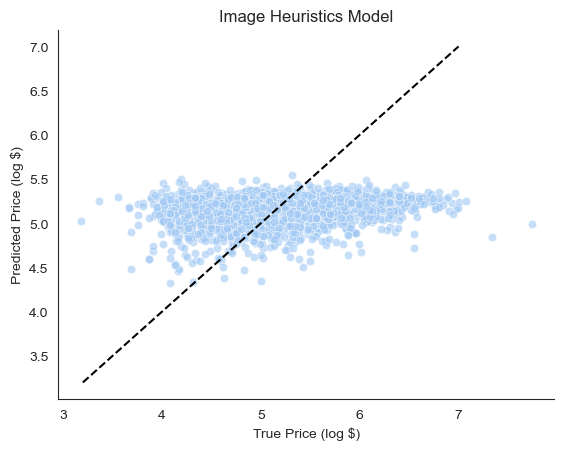

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

COLUMNS = ['Width', 'Height', 'Brightness', 'c1', 'c2', 'c3', 'd1', 'd2', 'd3']
df = df3[COLUMNS + ["price"]]

# run linear regression
X, y = df[COLUMNS], df["price"]
reg = LinearRegression().fit(X, y)
predicted = reg.predict(X)
print("Score:", reg.score(X, y))

# plot the data
sns.set_style("white")
sns.set_palette("pastel")
sns.scatterplot(x=y, y=predicted, alpha=0.6)
x_range = np.linspace(3.2, 7, 10)
sns.lineplot(x=x_range, y=x_range, color='k', ls="--")
plt.xlabel("True Price (log $)")
plt.ylabel("Predicted Price (log $)")
plt.title("Image Heuristics Model")
sns.despine()
plt.savefig("../figures/image_heuristics_model.png", dpi=200)
plt.show()